Name : Sarvesh Kumar Rai               Enrollment No. : 23117128                Batch : ME6

In [116]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, roc_auc_score
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.combine import SMOTEENN
from imblearn.under_sampling import TomekLinks
from sklearn.utils.class_weight import compute_class_weight 
from sklearn.datasets import make_classification


using make_Classification to make an imbalance dataset

In [117]:
X, y = make_classification(
    n_samples=1000,    # Total samples
    n_features=15,     # Number of features
    n_informative=2,   # Number of informative features
    n_redundant=5,    # Number of redundant features
    n_clusters_per_class=1,
    weights=[0.9, 0.1],  # Imbalance: 90% of one class, 10% of another
    flip_y=0,          # No noise
    random_state=42
)

column_names = [f'feature_{i}' for i in range(X.shape[1])]

In [118]:
df = pd.DataFrame(X, columns=column_names)
df['target'] = y  

In [119]:
print(df.head())

   feature_0  feature_1  feature_2  feature_3  feature_4  feature_5  \
0  -1.155871  -1.352670  -1.029372  -1.074623   1.871723   1.112688   
1   0.614117   1.399418  -0.795655  -0.952206   0.522692  -1.311549   
2   1.287361  -0.583722   1.176533  -0.931508   0.035330   0.029796   
3  -0.394604   0.569760   0.491429  -1.098602   1.367837  -0.098845   
4  -1.092253  -0.964790   1.187078  -1.002207   1.755488  -0.724303   

   feature_6  feature_7  feature_8  feature_9  feature_10  feature_11  \
0  -1.218586   0.408653  -0.523408   1.533728   -0.348967   -0.364242   
1  -0.798825   0.510601  -1.253254  -0.851180    0.898428   -0.103099   
2  -0.663722  -1.225000  -1.556868   1.483744    1.385003   -0.008807   
3  -1.110811  -0.404397  -0.914356  -2.532246    0.223407   -0.266849   
4  -1.138917   0.359681  -0.481260  -0.358958   -0.335972   -0.341610   

   feature_12  feature_13  feature_14  target  
0   -0.629263   -1.776235   -1.522359       0  
1    0.188073   -0.024129   -0.236537 

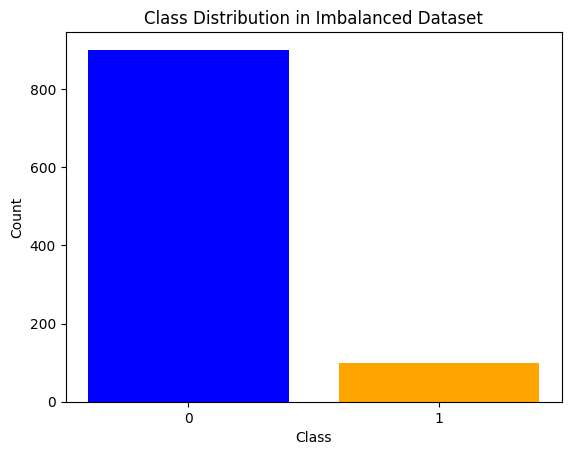

In [120]:
unique, counts = np.unique(y, return_counts=True)
plt.bar(unique, counts, color=['blue', 'orange'])
plt.xlabel('Class')
plt.ylabel('Count')
plt.title('Class Distribution in Imbalanced Dataset')
plt.xticks(unique)
plt.show()

In [121]:
df.shape

(1000, 16)

In [122]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   feature_0   1000 non-null   float64
 1   feature_1   1000 non-null   float64
 2   feature_2   1000 non-null   float64
 3   feature_3   1000 non-null   float64
 4   feature_4   1000 non-null   float64
 5   feature_5   1000 non-null   float64
 6   feature_6   1000 non-null   float64
 7   feature_7   1000 non-null   float64
 8   feature_8   1000 non-null   float64
 9   feature_9   1000 non-null   float64
 10  feature_10  1000 non-null   float64
 11  feature_11  1000 non-null   float64
 12  feature_12  1000 non-null   float64
 13  feature_13  1000 non-null   float64
 14  feature_14  1000 non-null   float64
 15  target      1000 non-null   int64  
dtypes: float64(15), int64(1)
memory usage: 125.1 KB


In [123]:
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

In [124]:
undersample = RandomUnderSampler()
X_rus, y_rus = undersample.fit_resample(X, y)

In [125]:
smote = SMOTE()
X_smote, y_smote = smote.fit_resample(X, y)

In [126]:
from imblearn.over_sampling import RandomOverSampler

ros = RandomOverSampler(random_state=42)
X_ros, y_ros = ros.fit_resample(X_train, y_train) 

In [127]:
# Tomek Links
tl = TomekLinks()
X_tl, y_tl = tl.fit_resample(X_train, y_train) 

In [128]:
class_weights = compute_class_weight(class_weight='balanced', classes=np.unique(y_train), y=y_train)
class_weights_dict = dict(enumerate(class_weights)) 

So to confirm if the data is balanced or not we use AOC for both target values i.e. 0 and 1

In [129]:
y_resampled_series = pd.Series(y_resampled)
proportion_class_1 = y_resampled_series[y_resampled_series == 1].value_counts() / y_resampled_series.count()
proportion_class_1

1    0.5
Name: count, dtype: float64

In [130]:
y_resampled_series = pd.Series(y_resampled)
proportion_class_1 = y_resampled_series[y_resampled_series == 0].value_counts() / y_resampled_series.count()
proportion_class_1

0    0.5
Name: count, dtype: float64

In [131]:
def evaluate_model(X_train, y_train, X_test, y_test, class_weights=None):
    model = RandomForestClassifier(class_weight=class_weights, random_state=42)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    y_prob = model.predict_proba(X_test)[:, 1]
    
    print(classification_report(y_test, y_pred))
    print("AUC:", roc_auc_score(y_test, y_prob)) 

In [132]:
print("Random Undersampling:")
evaluate_model(X_rus, y_rus, X_test, y_test)

print("\nRandom Oversampling:")
evaluate_model(X_ros, y_ros, X_test, y_test)

print("\nSMOTE:")
evaluate_model(X_smote, y_smote, X_test, y_test)

print("\nTomek Links:")
evaluate_model(X_tl, y_tl, X_test, y_test)

print("\nClass Weights:")
evaluate_model(X_train, y_train, X_test, y_test, class_weights_dict) 

Random Undersampling:
              precision    recall  f1-score   support

           0       0.99      0.99      0.99       179
           1       0.99      0.99      0.99       181

    accuracy                           0.99       360
   macro avg       0.99      0.99      0.99       360
weighted avg       0.99      0.99      0.99       360

AUC: 0.9989505848945955

Random Oversampling:
              precision    recall  f1-score   support

           0       0.98      1.00      0.99       179
           1       1.00      0.98      0.99       181

    accuracy                           0.99       360
   macro avg       0.99      0.99      0.99       360
weighted avg       0.99      0.99      0.99       360

AUC: 0.9997222136485694

SMOTE:
              precision    recall  f1-score   support

           0       0.99      1.00      0.99       179
           1       1.00      0.99      0.99       181

    accuracy                           0.99       360
   macro avg       0.99     

In [133]:
model = RandomForestClassifier(class_weight='balanced', random_state=12)
model.fit(X_train, y_train)

RandomForestClassifier(class_weight='balanced', random_state=12)

In [134]:
y_pred = model.predict(X_test)
y_pred

array([1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0,
       0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0,
       0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1,
       1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1,
       0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1,
       0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0,
       1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1,
       1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,

In [135]:
print("Classification Report:\n", classification_report(y_test, y_pred))
print("AUC-ROC:", roc_auc_score(y_test, model.predict_proba(X_test)[:, 1]))

Classification Report:
               precision    recall  f1-score   support

           0       0.98      1.00      0.99       179
           1       1.00      0.98      0.99       181

    accuracy                           0.99       360
   macro avg       0.99      0.99      0.99       360
weighted avg       0.99      0.99      0.99       360

AUC-ROC: 0.9997376462236489
